In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 获取数据

In [31]:
data = pd.read_csv("./data/nba_2017_nba_players_with_salary.csv")

In [32]:
data.head(10)  # 威斯布鲁克

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96
5,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,...,75,35.9,4.63,-1.49,3.14,10.72,15.9,99.68,38,24.33
6,8,LeBron James,SF,32,37.8,9.9,18.2,0.548,1.7,4.6,...,74,37.8,6.49,1.93,8.42,20.43,18.3,98.38,51,30.96
7,9,Kawhi Leonard,SF,25,33.4,8.6,17.7,0.485,2.0,5.2,...,74,33.4,5.83,1.25,7.08,15.53,17.4,95.79,54,17.64
8,10,Stephen Curry,PG,28,33.4,8.5,18.3,0.468,4.1,10.0,...,79,33.4,7.27,0.14,7.41,18.80,15.1,105.08,65,12.11
9,11,Kyrie Irving,PG,24,35.1,9.3,19.7,0.473,2.5,6.1,...,72,35.1,4.35,-2.30,2.05,8.28,13.5,99.12,47,17.64


- 我们可以看到该数据的前五列是按当年的得分榜排序的，分别是威少、哈登、地表最强175、浓眉哥和考神。而数据包含39列，即不同维度的技术统计。而此份数据提供了这300+球员的众多项比赛数据，我希望通过数据分析来发现其中的有趣的信息。

In [33]:
data.shape

(342, 38)

In [34]:
data.describe()

,Rk,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,320.000000,342.000000,...,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,217.269006,26.444444,21.572515,3.483626,7.725439,0.446096,0.865789,2.440058,0.307016,2.620175,...,58.198830,21.572807,-0.676023,-0.005789,-0.681813,2.861725,9.186842,98.341053,28.950292,7.294006
std,136.403138,4.295686,8.804018,2.200872,4.646933,0.078992,0.780010,2.021716,0.134691,1.828714,...,22.282015,8.804121,2.063237,1.614293,2.522014,3.880914,3.585475,2.870091,14.603876,6.516326
min,1.000000,19.000000,2.200000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.200000,-4.430000,-3.920000,-6.600000,-2.320000,-1.600000,87.460000,0.000000,0.030000
25%,100.250000,23.000000,15.025000,1.800000,4.225000,0.402250,0.200000,0.800000,0.280250,1.200000,...,43.500000,15.025000,-2.147500,-1.222500,-2.422500,0.102500,7.100000,96.850000,19.000000,2.185000
50%,205.500000,26.000000,21.650000,3.000000,6.700000,0.442000,0.700000,2.200000,0.340500,2.200000,...,66.000000,21.650000,-0.990000,-0.130000,-1.170000,1.410000,8.700000,98.205000,29.000000,4.920000
75%,327.750000,29.000000,29.075000,4.700000,10.400000,0.481000,1.400000,3.600000,0.373500,3.700000,...,76.000000,29.075000,0.257500,1.067500,0.865000,4.487500,10.900000,100.060000,39.000000,11.110000
max,482.000000,40.000000,37.800000,10.300000,24.000000,0.750000,4.100000,10.000000,1.000000,9.700000,...,82.000000,37.800000,7.270000,6.020000,8.420000,20.430000,23.000000,109.870000,66.000000,30.960000


- 从数据中看几项比较重要的信息：

    - 球员平均年龄为26.4岁，年龄段在19-40岁；年龄最大的是球员是文斯-卡特；
    - 球员平均年薪为730万美金，当时最大的合同为年薪3000万美金（勒布朗-詹姆斯）；
    - 球员平均出场时间为21.5分钟，某球员场均出场37.8分钟领跑联盟（詹姆斯），当然也有只出场2.2分钟的角色球员，机会来之不易。
    - 类似的信息我们还能总结很多。

# 数据分析

##  数据相关性

- 效率值相关性分析
    - 在众多的数据中，有一项名为“RPM”，标识球员的效率值，该数据反映球员在场时对球队比赛获胜的贡献大小，最能反映球员的综合实力。
我们来看一下它与其他数据的相关性：

In [35]:
data_cor = data.loc[:, ['RPM', 'AGE', 'SALARY_MILLIONS', 'ORB', 'DRB', 'TRB',
                       'AST', 'STL', 'BLK', 'TOV', 'PF', 'POINTS', 'GP', 'MPG', 'ORPM', 'DRPM']]

data_cor.head()

,RPM,AGE,SALARY_MILLIONS,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,GP,MPG,ORPM,DRPM
0,6.27,28,26.50,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6,81,34.6,6.74,-0.47
1,4.81,27,26.50,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1,81,36.4,6.38,-1.57
2,1.83,27,6.59,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9,76,33.8,5.72,-3.89
3,4.35,23,22.12,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0,75,36.1,0.45,3.90
4,4.20,26,16.96,2.1,8.9,11.0,4.6,1.4,1.3,3.7,3.9,27.0,72,34.2,3.56,0.64


In [36]:
corr = data_cor.corr()
# 【直观理解皮尔逊相关系数（r）和决定系数（r平方）】 https://www.bilibili.com/video/BV1Cx4y1r7v5/

In [37]:
# 获取两列数据之间的相关性
corr.head()

,RPM,AGE,SALARY_MILLIONS,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,GP,MPG,ORPM,DRPM
RPM,1.000000,0.175820,0.477542,0.388764,0.623515,0.587853,0.481971,0.599008,0.463097,0.492014,0.434226,0.604432,0.340810,0.549449,0.769822,0.578388
AGE,0.175820,1.000000,0.353312,-0.015752,0.088859,0.062064,0.114908,0.069892,-0.062917,0.030673,0.005512,0.031422,0.051863,0.099657,0.136177,0.100636
SALARY_MILLIONS,0.477542,0.353312,1.000000,0.264954,0.531569,0.482088,0.486159,0.446763,0.260288,0.536993,0.341512,0.635425,0.348093,0.594162,0.503682,0.102307
ORB,0.388764,-0.015752,0.264954,1.000000,0.731345,0.861103,-0.011632,0.169075,0.654265,0.274670,0.557957,0.284908,0.296975,0.342140,0.102113,0.476857
DRB,0.623515,0.088859,0.531569,0.731345,1.000000,0.976244,0.350786,0.485726,0.660733,0.598043,0.670708,0.648267,0.473376,0.684662,0.428433,0.426536


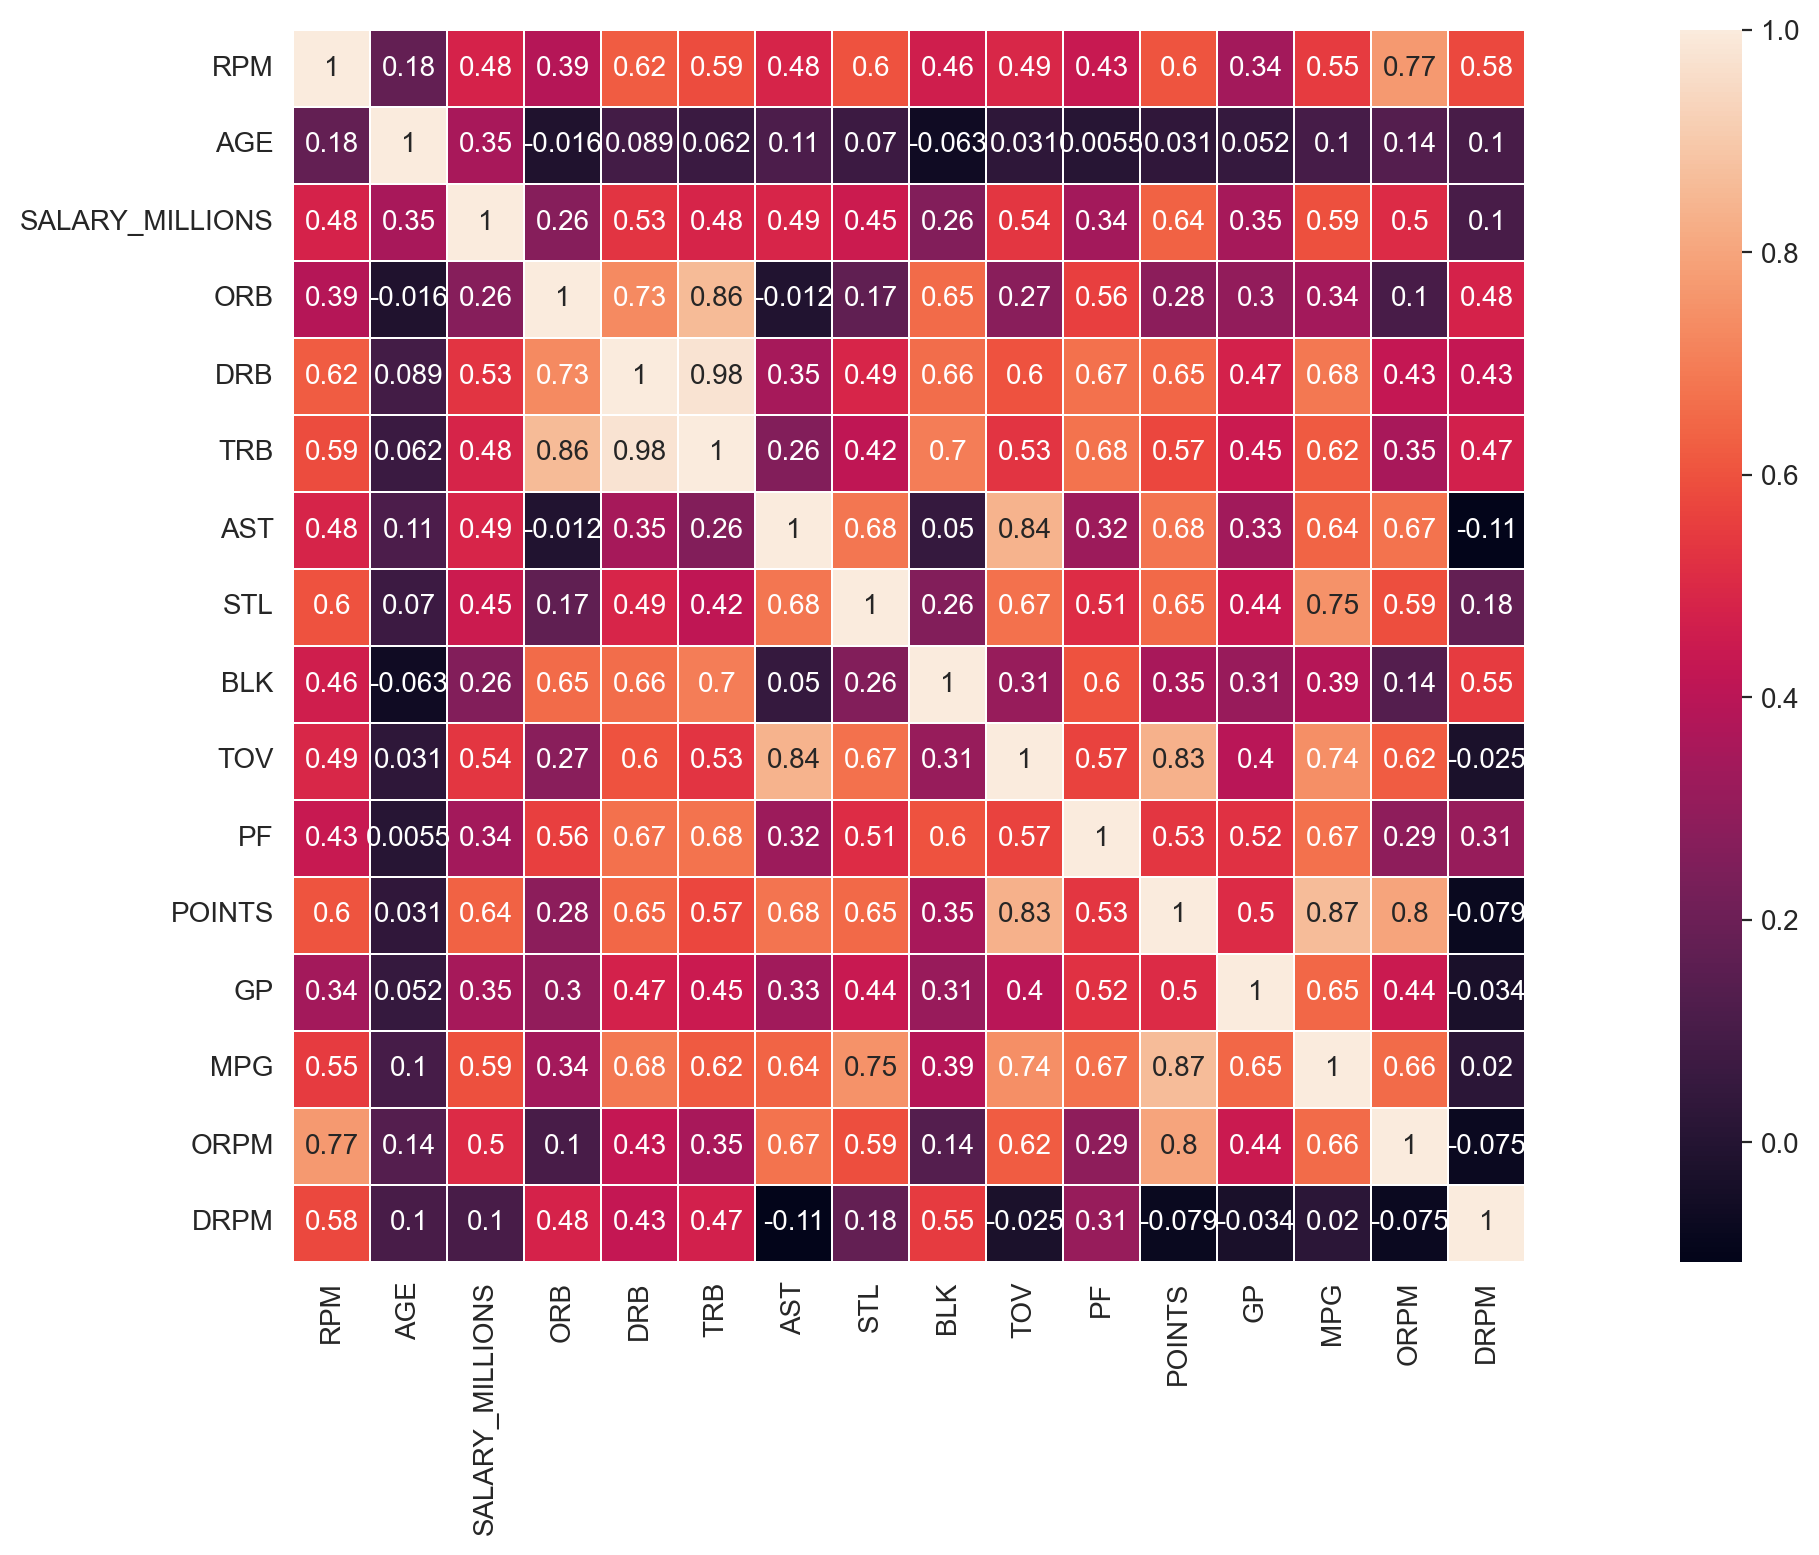

In [38]:
plt.figure(figsize=(20, 8), dpi=200)

sns.heatmap(corr, square=True, linewidths=0.1, annot=True)
plt.show()

- 由相关性分析的heatmap图可以看出，RPM值与年龄的相关性最弱，与“进攻正负值”、“防守篮板”、“场均得分”、“场均抢断数”等比赛技术数据的相关性最强。
我在接下来的分析中将把RPM作为评价一个球员能力及状态的直观反应因素之一。

## 基本数据排名分析
- 此处练习了一下pandas基本的数据框相关操作，包括提取部分列、head()展示、排序等，简单通过几个维度的展示，笼统地看一下16-17赛季那些球员冲在联盟的最前头。

In [39]:
# 按照效率值排名
data.loc[:, ["PLAYER", "RPM", "AGE"]].sort_values(by="RPM", ascending=False).head(15)

,PLAYER,RPM,AGE
6,LeBron James,8.42,32
37,Chris Paul,7.92,31
8,Stephen Curry,7.41,28
120,Draymond Green,7.14,26
7,Kawhi Leonard,7.08,25
44,Nikola Jokic,6.73,21
12,Jimmy Butler,6.62,27
66,Rudy Gobert,6.37,24
0,Russell Westbrook,6.27,28
10,Kevin Durant,5.74,28


- 从上表可以看出，詹皇拿着联盟最高的薪水，打球也毫不含糊，效率值排名第一。保罗和库里紧随其后，在前10的榜单里，宇宙勇占据3席（库里+追梦+杜兰特）。值得一提的是，掘金队的约基奇和爵士队的戈贝尔，拿着较为微薄的工资却打出了联盟前10的效率，这也为他们接下来的大合同奠定了基础。

In [40]:
# 按照球员薪资排名

data.loc[:, ["PLAYER", "RPM", "AGE", "SALARY_MILLIONS"]].sort_values(by="SALARY_MILLIONS", ascending=False).head(15)

,PLAYER,RPM,AGE,SALARY_MILLIONS
6,LeBron James,8.42,32,30.96
67,Al Horford,1.82,30,26.54
25,Mike Conley,4.47,29,26.54
0,Russell Westbrook,6.27,28,26.50
1,James Harden,4.81,27,26.50
10,Kevin Durant,5.74,28,26.50
64,Dirk Nowitzki,0.26,38,25.00
19,Carmelo Anthony,0.12,32,24.56
5,Damian Lillard,3.14,26,24.33
34,Dwyane Wade,-0.91,35,23.20


- 上表可以看出，勒布朗詹姆斯为该赛季薪水最高的球员，麦克康利拿到了大合同，但其RPM效率值在群星璀璨的薪金榜单上略显黯淡。同样出现在薪资榜单的还有威少、哈登、杜兰特等球星，库里由于之前的合同太小，并没有出现在前10名里。

In [41]:
#出场时间最高的10名运动员
data.loc[:,['PLAYER','RPM','SALARY_MILLIONS','AGE','MPG']].sort_values(by='MPG',ascending=False).head(10)

,PLAYER,RPM,SALARY_MILLIONS,AGE,MPG
6,LeBron James,8.42,30.96,32,37.8
32,Zach LaVine,-2.97,2.24,21,37.2
14,Andrew Wiggins,-1.60,6.01,21,37.2
11,Karl-Anthony Towns,2.13,5.96,21,37.0
12,Jimmy Butler,6.62,17.55,27,37.0
17,John Wall,2.26,16.96,26,36.4
1,James Harden,4.81,26.50,27,36.4
3,Anthony Davis,4.35,22.12,23,36.1
5,Damian Lillard,3.14,24.33,26,35.9
13,Paul George,2.58,18.31,26,35.9


### 单变量：

In [42]:
# 利用seaborn中的distplot绘图来分别看一下球员薪水、效率值、年龄这三个信息的分布情况

sns.set_style("darkgrid")

plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
sns.histplot(data["SALARY_MILLIONS"])  # sns.distplot替换掉老版的sns.histplot

plt.subplot(3, 1, 2)
sns.histplot(data["RPM"])

plt.subplot(3, 1, 3)
sns.histplot(data["AGE"])

<Axes: xlabel='AGE', ylabel='Count'>

###  双变量

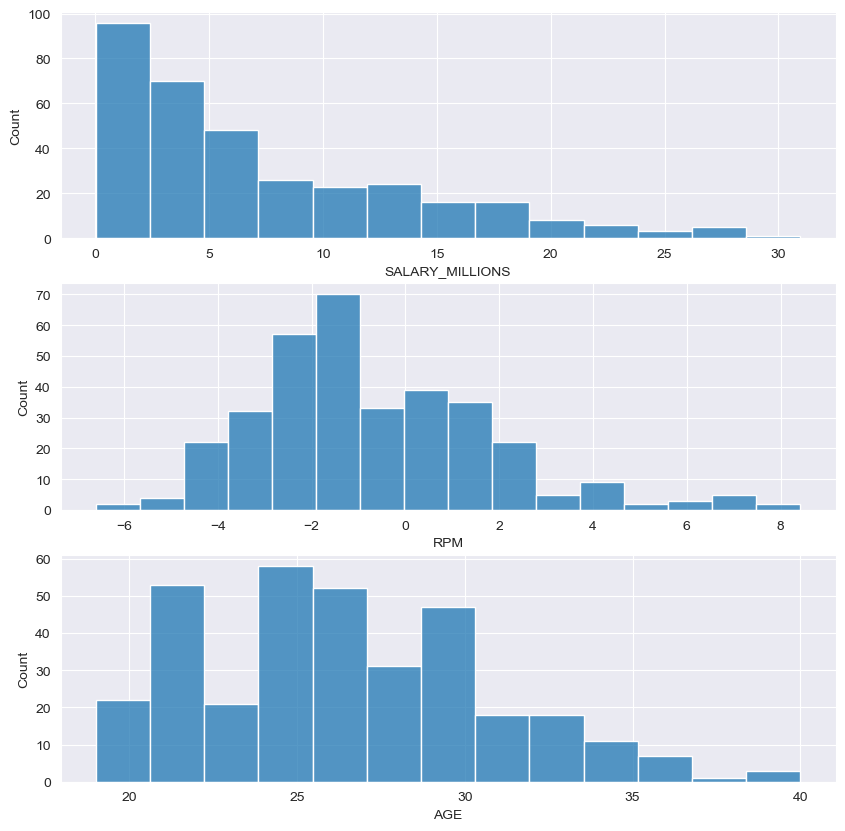

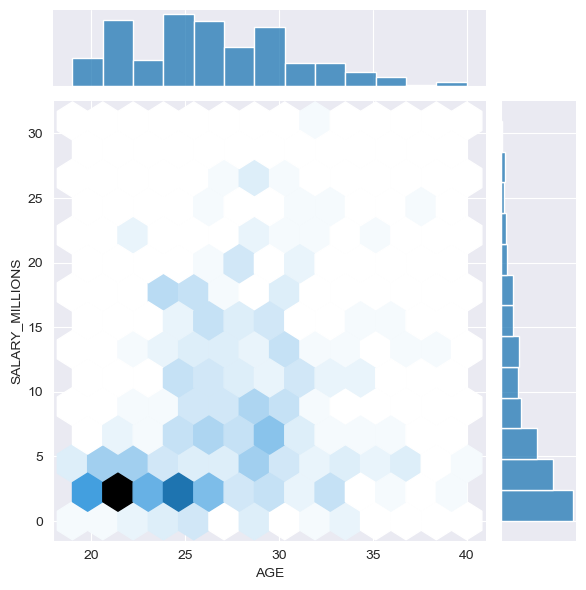

In [43]:
sns.jointplot(x=data.AGE, y=data.SALARY_MILLIONS, kind="hex")
plt.show()

- 这段代码使用 Seaborn 的 jointplot 绘制了 NBA 球员年龄（AGE）与年薪（SALARY_MILLIONS，单位：百万美元）的六边形密度图（kind="hex"）。图中六边形颜色越深，表示该年龄段和薪资区间内的球员越密集。中间主图显示，大多数球员集中在 25–35 岁、年薪 500 万–2000 万美元之间；年轻球员（<25 岁）普遍薪资较低，但有少数高薪新秀；35 岁以上高薪球员明显减少。上方和右侧的直方图分别展示了年龄和薪资的边际分布：年龄呈钟形分布，峰值在 25–30 岁；薪资呈右偏分布，多数集中在 500 万–1500 万美元，少数顶薪球员拉高整体水平。该图揭示了球员薪资与年龄呈非线性关系，25–30 岁为薪资黄金期。



### 多变量

In [44]:
# 该代码选取数据中的 RPM、SALARY_MILLIONS、AGE 和 POINTS 四个变量，用 sns.pairplot() 绘制它们之间的散点图矩阵和各自分布直方图，用于直观探索变量间的两两关系。
multi_data = data.loc[:, ['RPM','SALARY_MILLIONS','AGE','POINTS']]
multi_data.head()

,RPM,SALARY_MILLIONS,AGE,POINTS
0,6.27,26.50,28,31.6
1,4.81,26.50,27,29.1
2,1.83,6.59,27,28.9
3,4.35,22.12,23,28.0
4,4.20,16.96,26,27.0


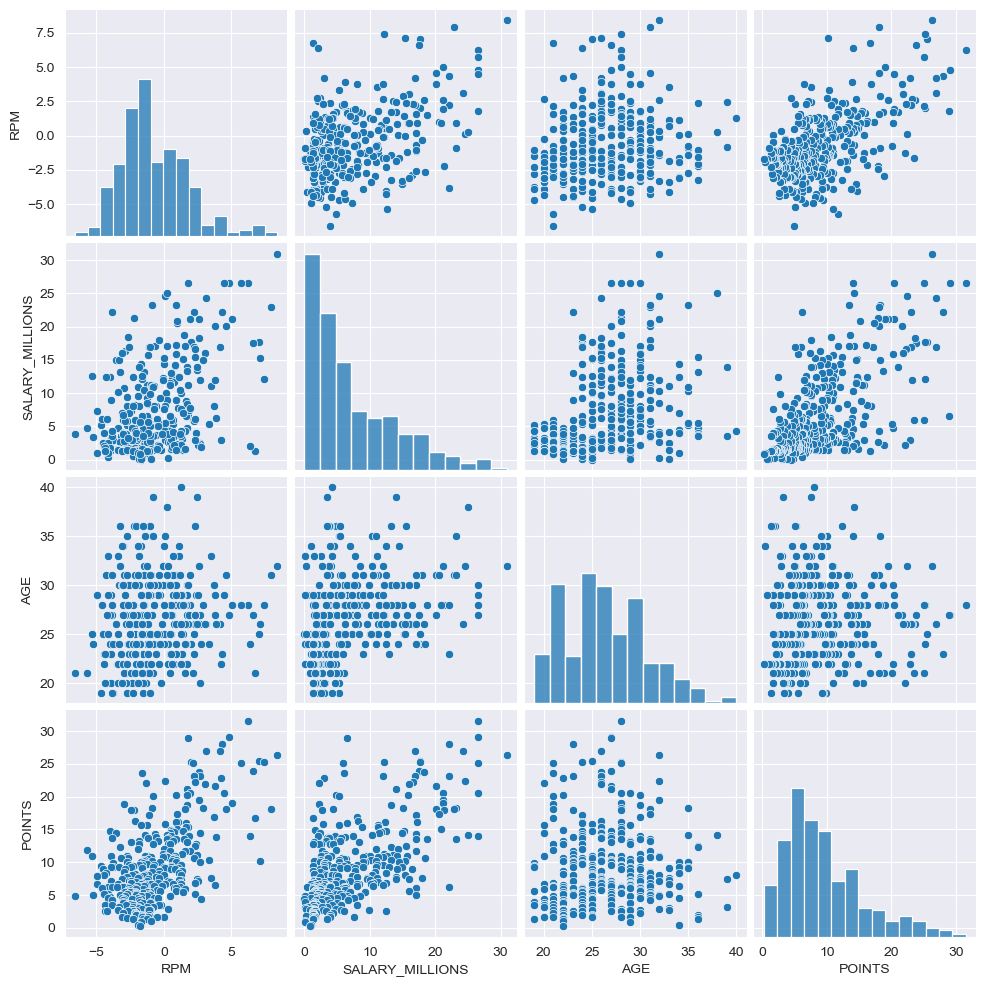

In [45]:
sns.pairplot(multi_data)
plt.show()

## 衍生变量的一些可视化实践-以年龄为例

In [46]:
def age_cut(df):
    """年龄划分"""
    if df.AGE <= 24:
        return "young"
    elif df.AGE >= 30:
        return "old"
    else:
        return "best"

In [47]:
# 使用apply对年龄进行划分
data["age_cut"] = data.apply(lambda x:age_cut(x), axis=1) # axis=1表示对行进行操作

In [48]:
data.head(10)

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,age_cut
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50,best
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50,best
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59,best
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12,young
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96,best
5,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,...,35.9,4.63,-1.49,3.14,10.72,15.9,99.68,38,24.33,best
6,8,LeBron James,SF,32,37.8,9.9,18.2,0.548,1.7,4.6,...,37.8,6.49,1.93,8.42,20.43,18.3,98.38,51,30.96,old
7,9,Kawhi Leonard,SF,25,33.4,8.6,17.7,0.485,2.0,5.2,...,33.4,5.83,1.25,7.08,15.53,17.4,95.79,54,17.64,best
8,10,Stephen Curry,PG,28,33.4,8.5,18.3,0.468,4.1,10.0,...,33.4,7.27,0.14,7.41,18.80,15.1,105.08,65,12.11,best
9,11,Kyrie Irving,PG,24,35.1,9.3,19.7,0.473,2.5,6.1,...,35.1,4.35,-2.30,2.05,8.28,13.5,99.12,47,17.64,young


In [49]:
# 方便计数，用于后续分组统计
data["cut"] = 1

In [50]:
data.loc[data.age_cut == "best"].SALARY_MILLIONS.head()

0    26.50
1    26.50
2     6.59
4    16.96
5    24.33
Name: SALARY_MILLIONS, dtype: float64

同样的目的，也可以使用numpy模块中的函数np.where，与excel中的if函数和R语言中的ifelse函数几乎是一样的，非常简便。

既然得到了老中青三代的标签，我们来看一下不同年龄段球员的RPM（正负值）与薪水之前的关系如何：

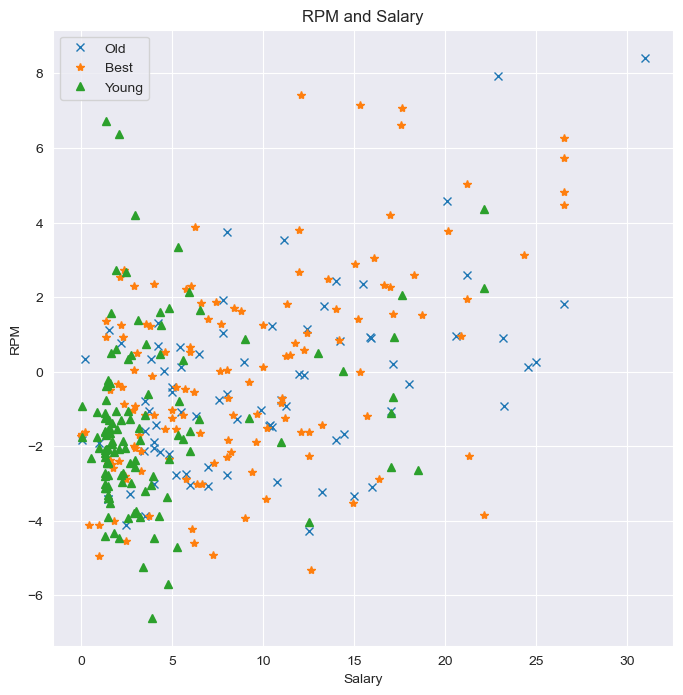

In [51]:
# 基于年龄段对球员薪水和效率值进行分析
sns.set_style("darkgrid")
plt.figure(figsize=(8,8), dpi=100)
plt.title("RPM and Salary")

x1 = data.loc[data.age_cut == "old"].SALARY_MILLIONS
y1 = data.loc[data.age_cut == "old"].RPM
plt.plot(x1, y1, "x")


x2 = data.loc[data.age_cut == "best"].SALARY_MILLIONS
y2 = data.loc[data.age_cut == "best"].RPM
plt.plot(x2, y2, "*")


x3 = data.loc[data.age_cut == "young"].SALARY_MILLIONS
y3 = data.loc[data.age_cut == "young"].RPM
plt.plot(x3, y3, "^")

plt.legend(["Old", "Best", "Young"])
plt.xlabel("Salary")
plt.ylabel("RPM")
plt.show()

- 点图横坐标为球员薪水，纵坐标为效率值。可以观测到：

    - 绝大部分的年轻球员拿着较低的薪水，数据非常集中。有两个离群点，是上文提到的戈贝尔和约基奇，两个小兄弟前途无量啊。
    - 黄金年龄的球员和老球员的数据相对发散，黄金年龄球员薪水与效率值正相关性更强。第一集团有几个全明星排头兵。
    - 老球员过了呼风唤雨的年纪，运动状态有所下滑，“高薪低效”的球员也稍微多一些。

- 用同样的方法看一下老中青三代各技术统计的分布情况：

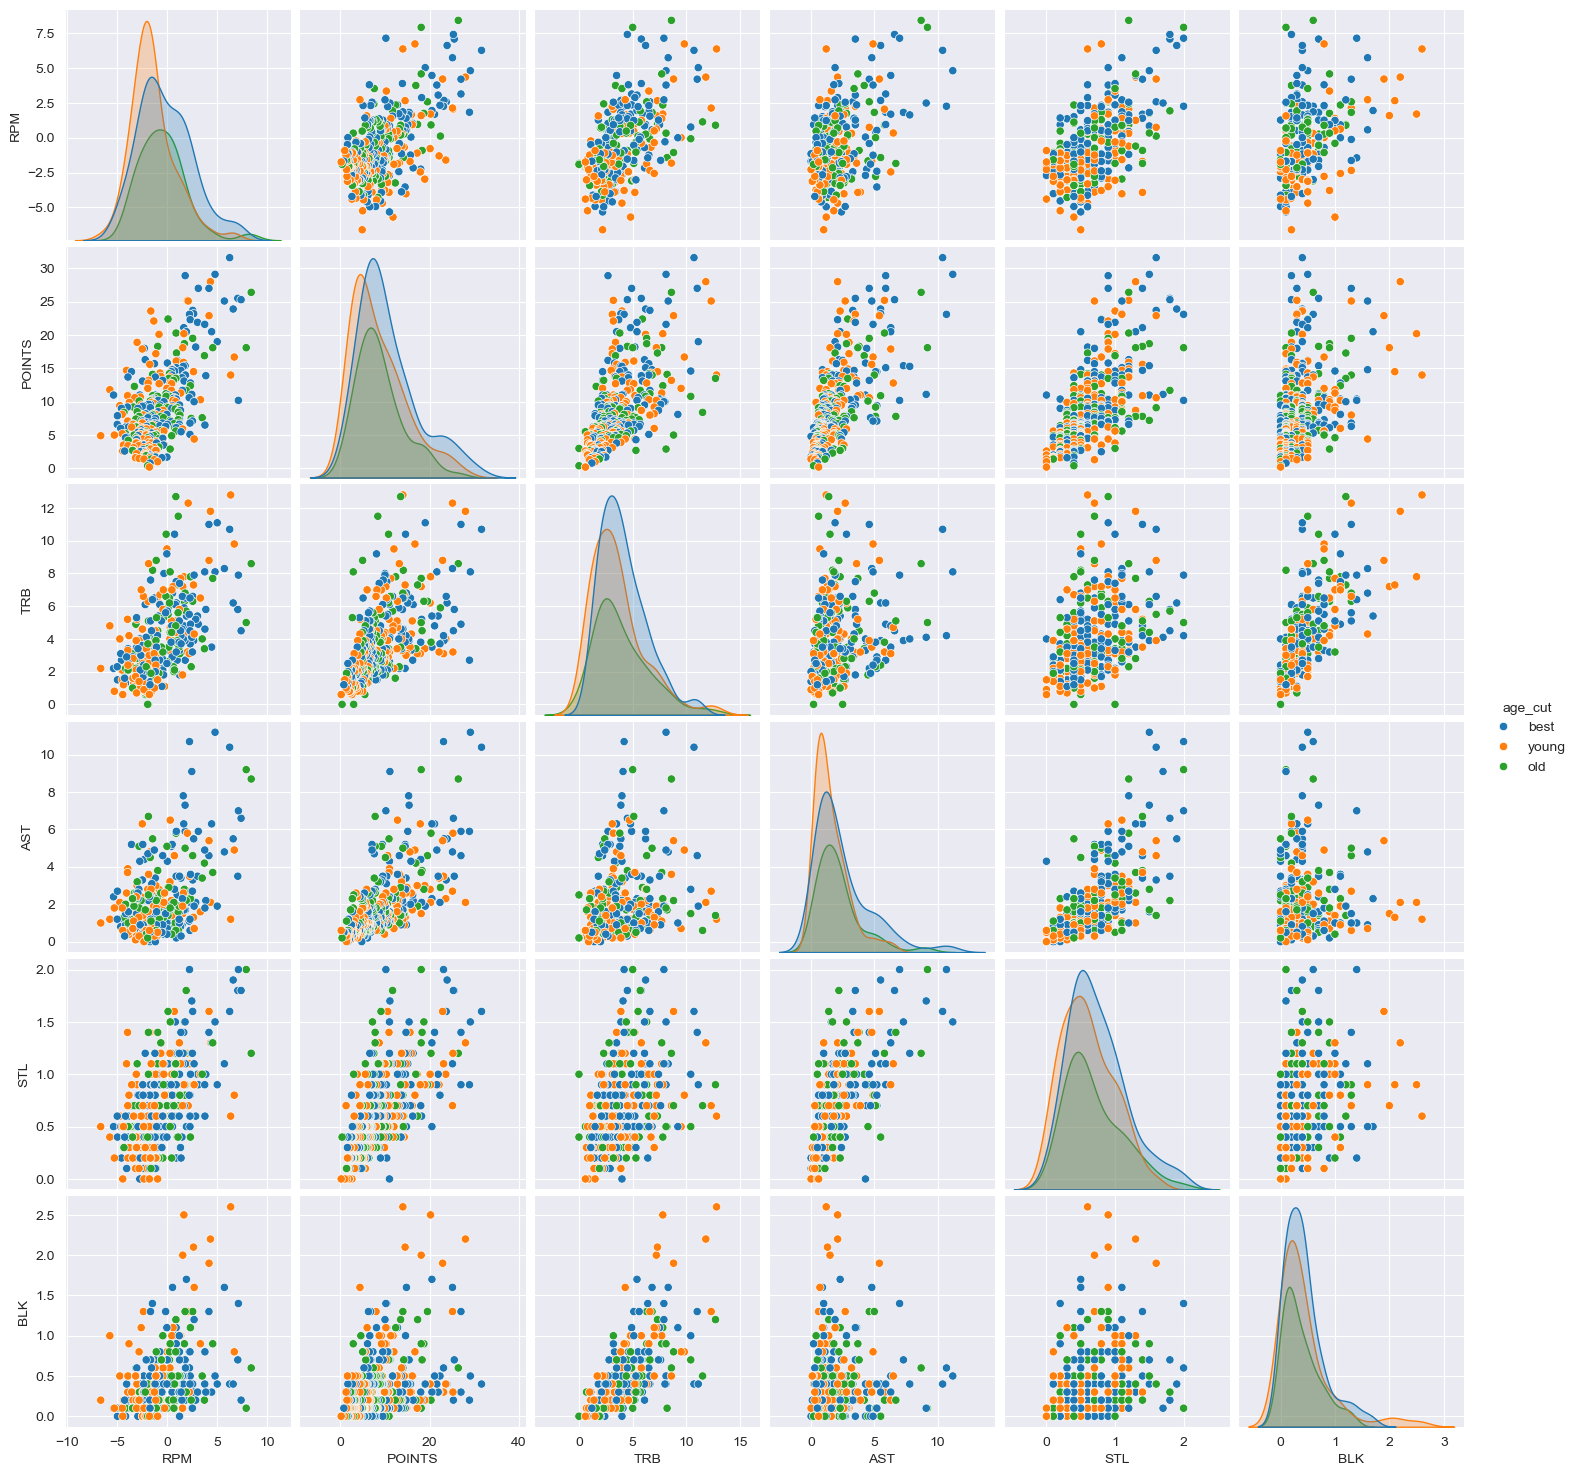

In [52]:
multi_data2 = data.loc[:, ['RPM','POINTS','TRB','AST','STL','BLK','age_cut']]

sns.pairplot(multi_data2, hue="age_cut")
plt.show()

# 球队数据分析

## 球队薪资排行
- 将数据按球队分组，平均薪水降序排列，看一下联盟十大土豪球队：

In [53]:
### 分组操作 按球队
"""
这段代码的目的是对数据集 data 按照 'TEAM' 列进行分组，并计算每支球队的球员平均薪资（'SALARY_MILLIONS'）、平均效率值（'RPM'）以及球员数量（'PLAYER'）。
之后，它过滤掉那些在赛季中转会（即在该队球员数 'PLAYER' 小于等于5）的球队数据，并按照平均薪资从高到低排序，最后返回平均薪资最高的前10支球队的数据
"""
dat_grp=data.groupby(by=['TEAM'],as_index=False).agg({
    'SALARY_MILLIONS':"mean",
    'RPM':"mean",
    'PLAYER':"size"
})
dat_grp=dat_grp.loc[dat_grp.PLAYER>5]  # 不考虑在赛季中转会的球员,设定 >5 是一个经验性阈值，确保分析的是完整阵容的主力球队（NBA 正常轮换通常至少 8–10 人）；虽然 NBA 球队名单通常有 15 人，但实际有统计记录的球员可能略少，>5 是一个保守但合理的过滤条件；
dat_grp.sort_values(by='SALARY_MILLIONS',ascending=False).head(10)

,TEAM,SALARY_MILLIONS,RPM,PLAYER
9,CLE,17.095000,2.566667,6
18,GS,12.701429,3.478571,7
43,POR,9.730000,-1.260000,10
48,WSH,9.628889,-0.506667,9
39,ORL,9.490000,-2.066667,9
44,SA,9.347273,0.901818,11
26,MEM,8.705000,-0.854167,12
35,NY,8.612727,-1.182727,11
11,DAL,8.480000,-1.037143,7
24,LAC,8.266000,0.319000,10


- 骑士队和勇士队已超高的薪水排在这份榜单的前两名，群星璀璨的他们最终在季后赛中一路厮杀，双双闯入分区决赛。
- 排在第三的开拓者有10名球员上榜，可谓后补活力充沛。球队薪金结构的健康与否对球队的发展至关重要。

## 球队年龄结构

按照分球队分年龄段，上榜球员降序排列，如上榜球员数相同，则按效率值降序排列。

In [54]:
### 分组操作 按场上位置
"""
按球队（TEAM）和年龄段（age_cut）对球员进行分组，计算每组的平均薪资、平均效率值（RPM）和球员人数，并筛选、排序后展示前15组。
"""
dat_grp2=data.groupby(by=['TEAM','age_cut'],as_index=False).agg({
    'SALARY_MILLIONS':"mean",
    'RPM':"mean",
    'PLAYER':"size"
})
dat_grp2=dat_grp2.loc[dat_grp2.PLAYER>3]     # 剔除每组球员人数≤ 3的组合,避免因某队某年龄段只有1–2人导致平均值失真
dat_grp2.sort_values(by=['PLAYER','RPM'],ascending=False).head(15)

,TEAM,age_cut,SALARY_MILLIONS,RPM,PLAYER
14,CHA,young,3.835000,-0.362500,8
9,BOS,best,7.034286,0.647143,7
105,TOR,young,4.158571,-0.555714,7
11,BOS,young,2.337143,-1.821429,7
67,MIN,best,5.560000,0.828333,6
32,DEN,young,2.181667,-0.206667,6
36,DET,best,7.638333,-0.386667,6
30,DEN,best,8.336667,-0.586667,6
63,MIL,best,9.708333,-0.625000,6
70,NO,best,6.720000,-0.738333,6


- 在这份榜单里，排在榜首的公牛队有年轻球员8人，但效率值偏低，小伙子们还需努力啊。
- 绿凯不得了，黄金年龄球员和年轻球员共14人，效率值较高，未来一片光明。
- 年轻的森林狼有6名黄金年龄球员，老马刺有5为年长球员，一老一小效率值还都不错。
- 最牛的还属宇宙勇，5名黄金年龄球员效率值为恐怖的4.7,明星在手天下我有！

## 球队综合实力分析

最后我们来看看球队综合实力：

按照效率值降序排列前10名球队的相关信息如下：

In [55]:
#数据可视化 按球队
"""
该代码按球队分组，计算每队在薪资、效率值（RPM）、得分、命中率等指标上的平均值及球员人数，剔除球员少于6人的球队后，按RPM从高到低排序，展示效率最高的前10支球队。
"""
dat_grp3=data.groupby(by=['TEAM'],as_index=False).agg({
    'SALARY_MILLIONS':'mean',
    'RPM':'mean',
    'PLAYER':'size',
    'POINTS':'mean',
    'eFG%':'mean',
    'MPG':'mean',
    'AGE':'mean'
})
dat_grp3=dat_grp3.loc[dat_grp3.PLAYER>5]
dat_grp3.sort_values(by=['RPM'],ascending=False).head(10)

,TEAM,SALARY_MILLIONS,RPM,PLAYER,POINTS,eFG%,MPG,AGE
18,GS,12.701429,3.478571,7,14.528571,0.575143,26.700000,28.714286
9,CLE,17.095000,2.566667,6,15.883333,0.555833,29.766667,28.000000
44,SA,9.347273,0.901818,11,9.818182,0.524182,21.472727,29.545455
24,LAC,8.266000,0.319000,10,8.740000,0.462800,18.700000,28.600000
38,OKC,8.060000,0.255556,9,10.677778,0.518111,22.566667,25.666667
47,UTAH,6.471667,-0.107500,12,10.233333,0.515917,24.008333,26.666667
6,CHA,6.779231,-0.277692,13,8.700000,0.447923,20.884615,25.076923
46,TOR,5.668000,-0.319000,10,5.800000,0.497800,17.170000,24.200000
31,NO,8.044444,-0.327778,9,9.411111,0.523222,24.322222,27.444444
5,BOS,6.142667,-0.426667,15,8.426667,0.565067,18.886667,24.666667


- 勇士和骑士占据前两名的位置，cross check了效率值反映球队实力的事实。
- 老马刺排名第三，平均年龄达29.5岁排名第一，更新血液迫在眉睫。
- 雷霆由于大威少的存在能排在第5位，各项数据中规中矩。

利用箱线图和小提琴图看着10支球队的相关数据

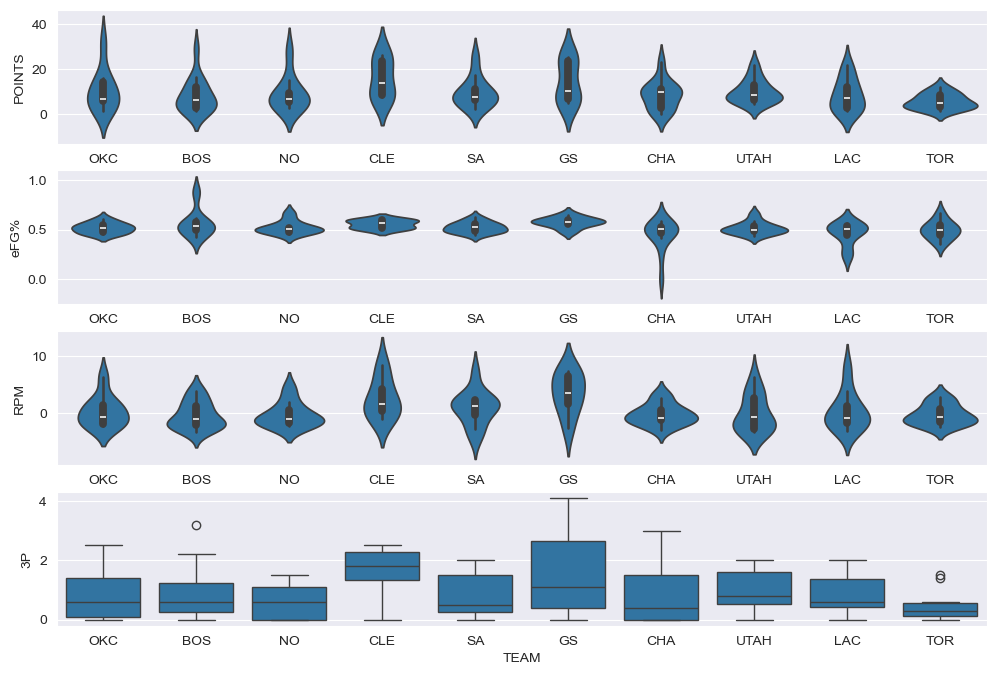

In [56]:
# 小提琴图解释：小提琴图是箱线图的一种扩展，它将箱线图和核密度图（KDE）结合，以显示数据的分布密度。
# 【什么是小提琴图？手把手教你看懂小提琴图】 https://www.bilibili.com/video/BV1jWMvzAE2G/
dat_grp4=data[data['TEAM'].isin(['GS','CLE','SA','LAC','OKC','UTAH','CHA','TOR','NO','BOS'])]
plt.figure(figsize=(12,8))
plt.subplot(4,1,1)
sns.violinplot(x='TEAM',y='POINTS',data=dat_grp4)

plt.subplot(4,1,2)
sns.violinplot(x='TEAM',y='eFG%',data=dat_grp4)

plt.subplot(4,1,3)
sns.violinplot(x='TEAM',y='RPM',data=dat_grp4)
# sns.boxplot(x='TEAM',y='RPM',data=dat_grp4)  # 查看球队的效率值的箱线图

plt.subplot(4,1,4)
sns.boxplot(x='TEAM',y='3P',data=dat_grp4)
plt.show()

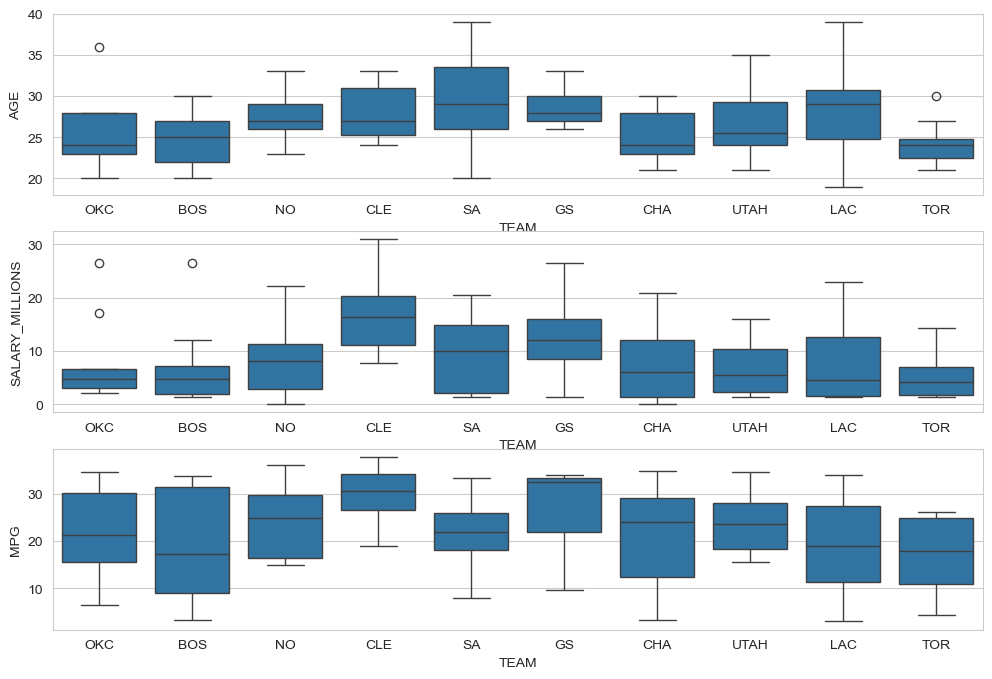

In [57]:
"""
这段代码使用 seaborn 和 matplotlib 来可视化特定 NBA 球队（'GS', 'CLE', 'SA', 'LAC', 'OKC', 'UTAH', 'CHA', 'TOR', 'NO', 'BOS'）在年龄（AGE）、薪资（SALARY_MILLIONS）和每场分钟数（MPG）这三个维度上的分布情况；
"""
sns.set_style('whitegrid')  # 设置seaborn的面板风格
plt.figure(figsize=(12,8))
dat_grp4=data[data['TEAM'].isin(['GS','CLE','SA','LAC','OKC','UTAH','CHA','TOR','NO','BOS'])]

plt.subplot(3,1,1)
sns.boxplot(x='TEAM',y='AGE',data=dat_grp4)

plt.subplot(3,1,2)
sns.boxplot(x='TEAM',y='SALARY_MILLIONS',data=dat_grp4)

plt.subplot(3,1,3)
sns.boxplot(x='TEAM',y='MPG',data=dat_grp4)

plt.show()

- 结合上述箱线图和小提琴图（共6个子图），我们可以看到：
- 从年龄结构看，老马刺年龄跨度最大，年龄中位数最高。猛龙队最年轻且年龄跨度最小，后劲十足。
- 从球队薪金看，勇士和骑士最高，俄村雷霆在失去杜兰特后栽了大跟头，薪金健康情况堪忧。
- 从出场时间看，骑士队最高且跨度低，小团体战斗能力出众。
- 从得分来看，骑士和勇士整体出众。雷霆的威少、绿军的小托马斯、醍醐的浓眉哥以及马刺的伦纳德均是各队的离群点，双拳难敌四手。
- 从命中率看，命中率各队非常集中，绿凯的小托马刺作为地表最强175远远高于其他人。
- 从效率值看，骑士和勇士是大赢家。各个队的离群点我们甚至不用通过具体的查询就可以猜到是哪位球员。

马刺作为老牌劲旅，居然有一个球员效率值为负离群点（sns.boxplot(x='TEAM',y='RPM',data=dat_grp4) ），查一下他是谁：

In [58]:
data.loc[data.TEAM=='SA'].sort_values(by='RPM',ascending=True).head(3)

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,age_cut,cut
311,424,Bryn Forbes,SG,23,7.9,1.0,2.8,0.364,0.5,1.5,...,-2.78,-1.62,-4.40,-0.22,4.8,95.86,24,1.31,young,1
292,388,Dejounte Murray,PG,20,8.5,1.3,3.1,0.431,0.2,0.6,...,-1.97,-0.83,-2.80,0.07,7.5,96.05,29,1.31,young,1
125,147,Tony Parker,PG,34,25.2,4.2,9.0,0.466,0.4,1.1,...,-0.69,-0.97,-1.66,1.42,9.3,93.94,46,14.45,old,1


- 布林-福布斯这个23岁的小伙子出现在了这个尴尬的位置，要好好加油了！